In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
### 使用 networkx 包中的函数 LFR_benchmark_graph 生成随机图
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

n = 1000
tau1 = 2  # Power-law exponent for the degree distribution
tau2 = 1.1 # Power-law exponent for the community size distribution 
            #S hould be >1
mu = 0.05 # Mixing parameter
avg_deg = 25 # Average Degree
max_deg = 100 # Max Degree
min_commu = 80 # Min Community Size
max_commu = 100 # Max Community Size

G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=avg_deg, max_degree=max_deg, min_community=min_commu, max_community=max_commu, 
    seed=7
)
### 去掉 G 中的重边和自环 
G = nx.Graph(G) # Remove multi-edges

selfloop_edges = list(nx.selfloop_edges(G)) # a list of self loops

G.remove_edges_from(selfloop_edges) # Remove self-loops

In [3]:
betweenness = nx.betweenness_centrality(G)
top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)

In [4]:
### LFR 图是有内在的社群结构的，每个节点的社群存储在其 community 属性中，是一个 set
# 通过运行循环，按照内在的社群结构给每个节点一个标签 即为其 intrinsic_membership
# 为了方便 intrinsic_membership 一开始是作为一个 np array 存储的
import numpy as np
intrinsic_communities = {frozenset(G.nodes[v]["community"]) for v in G}
intrinsic_membership = np.empty(G.number_of_nodes(), dtype=int)
for node in range(G.number_of_nodes()):
    for index, inner_set in enumerate(intrinsic_communities):
        if node in inner_set:
            intrinsic_membership[node] = index
            break
# intrinsic_membership = list(intrinsic_membership.values())

# 存储 list 和 clustering 格式的拷贝 省得以后需要再做类型转换了
#intrinsic_list = list(intrinsic_membership.values())
#from clusim.clustering import Clustering
#intrinsic_clustering = Clustering(elm2clu_dict={i: [intrinsic_membership[i]] for i in intrinsic_membership.keys()})

In [5]:
intrinsic_membership;

In [6]:
idx = [True] * G.number_of_nodes()

In [7]:
from auxpack.lle import lle
from auxpack.evaluate_embd702temp import evaluate_embd as EEE

from karateclub import DeepWalk

from ge import LINE

D=20
quxian =[]
for i in top_nodes:
    G.remove_node(i)
    print(f"Vertex {i}, ranking {top_nodes.index(i)+1} is removed.", end=' ')
    if not nx.is_connected(G):
        print("G is now disconnected!!")
        break
    embd = lle(G, 20)
    idx[i] = False
    K = len(np.unique(intrinsic_membership[idx]))
    defen = EEE(K, intrinsic_membership[idx], embd)
    quxian.append(defen)
    print(f"{K} clusters; {G.number_of_nodes()} vertices; NMI", defen)

Vertex 661, ranking 1 is removed. 11 clusters; 999 vertices; NMI 0.9616558117495001
Vertex 822, ranking 2 is removed. 11 clusters; 998 vertices; NMI 1.0
Vertex 979, ranking 3 is removed. 11 clusters; 997 vertices; NMI 1.0
Vertex 39, ranking 4 is removed. 11 clusters; 996 vertices; NMI 1.0
Vertex 853, ranking 5 is removed. 11 clusters; 995 vertices; NMI 1.0
Vertex 888, ranking 6 is removed. 11 clusters; 994 vertices; NMI 0.97648219951477
Vertex 57, ranking 7 is removed. 11 clusters; 993 vertices; NMI 1.0
Vertex 252, ranking 8 is removed. 11 clusters; 992 vertices; NMI 1.0
Vertex 40, ranking 9 is removed. 11 clusters; 991 vertices; NMI 1.0
Vertex 591, ranking 10 is removed. 11 clusters; 990 vertices; NMI 1.0
Vertex 652, ranking 11 is removed. 11 clusters; 989 vertices; NMI 1.0
Vertex 352, ranking 12 is removed. 11 clusters; 988 vertices; NMI 1.0
Vertex 917, ranking 13 is removed. 11 clusters; 987 vertices; NMI 0.9676529150830724
Vertex 356, ranking 14 is removed. 11 clusters; 986 vertice

Vertex 125, ranking 112 is removed. 11 clusters; 888 vertices; NMI 1.0
Vertex 73, ranking 113 is removed. 11 clusters; 887 vertices; NMI 1.0000000000000002
Vertex 84, ranking 114 is removed. 11 clusters; 886 vertices; NMI 1.0
Vertex 857, ranking 115 is removed. 11 clusters; 885 vertices; NMI 1.0
Vertex 594, ranking 116 is removed. 11 clusters; 884 vertices; NMI 1.0
Vertex 263, ranking 117 is removed. 11 clusters; 883 vertices; NMI 1.0
Vertex 592, ranking 118 is removed. 11 clusters; 882 vertices; NMI 1.0
Vertex 162, ranking 119 is removed. 11 clusters; 881 vertices; NMI 0.9718772460297973
Vertex 347, ranking 120 is removed. 11 clusters; 880 vertices; NMI 1.0
Vertex 139, ranking 121 is removed. 11 clusters; 879 vertices; NMI 1.0000000000000002
Vertex 955, ranking 122 is removed. 11 clusters; 878 vertices; NMI 1.0
Vertex 1, ranking 123 is removed. 11 clusters; 877 vertices; NMI 0.9999999999999998
Vertex 408, ranking 124 is removed. 11 clusters; 876 vertices; NMI 0.9685297788220177
Vertex

Vertex 223, ranking 218 is removed. 11 clusters; 782 vertices; NMI 1.0
Vertex 648, ranking 219 is removed. 11 clusters; 781 vertices; NMI 1.0
Vertex 147, ranking 220 is removed. 11 clusters; 780 vertices; NMI 0.9583922593365387
Vertex 816, ranking 221 is removed. 11 clusters; 779 vertices; NMI 0.979654511081771
Vertex 28, ranking 222 is removed. 11 clusters; 778 vertices; NMI 1.0
Vertex 124, ranking 223 is removed. 11 clusters; 777 vertices; NMI 1.0
Vertex 93, ranking 224 is removed. 11 clusters; 776 vertices; NMI 1.0
Vertex 337, ranking 225 is removed. 11 clusters; 775 vertices; NMI 0.9798572671118491
Vertex 308, ranking 226 is removed. 11 clusters; 774 vertices; NMI 1.0
Vertex 12, ranking 227 is removed. 11 clusters; 773 vertices; NMI 1.0
Vertex 354, ranking 228 is removed. 11 clusters; 772 vertices; NMI 1.0
Vertex 286, ranking 229 is removed. 11 clusters; 771 vertices; NMI 1.0
Vertex 706, ranking 230 is removed. 11 clusters; 770 vertices; NMI 0.9684836293119189
Vertex 997, ranking 2

Vertex 715, ranking 326 is removed. 11 clusters; 674 vertices; NMI 1.0
Vertex 837, ranking 327 is removed. 11 clusters; 673 vertices; NMI 1.0
Vertex 491, ranking 328 is removed. 11 clusters; 672 vertices; NMI 1.0
Vertex 262, ranking 329 is removed. 11 clusters; 671 vertices; NMI 1.0
Vertex 655, ranking 330 is removed. 11 clusters; 670 vertices; NMI 1.0
Vertex 319, ranking 331 is removed. 11 clusters; 669 vertices; NMI 1.0
Vertex 639, ranking 332 is removed. 11 clusters; 668 vertices; NMI 1.0
Vertex 486, ranking 333 is removed. 11 clusters; 667 vertices; NMI 1.0
Vertex 25, ranking 334 is removed. 11 clusters; 666 vertices; NMI 1.0000000000000002
Vertex 614, ranking 335 is removed. 11 clusters; 665 vertices; NMI 1.0
Vertex 121, ranking 336 is removed. 11 clusters; 664 vertices; NMI 1.0
Vertex 930, ranking 337 is removed. 11 clusters; 663 vertices; NMI 1.0
Vertex 310, ranking 338 is removed. 11 clusters; 662 vertices; NMI 0.9999999999999998
Vertex 289, ranking 339 is removed. 11 clusters;

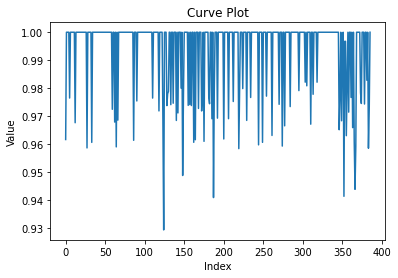

In [8]:
import matplotlib.pyplot as plt

# Example list of numbers
numbers = quxian

# Generate x-axis values based on the index of each number
x = range(len(numbers))

# Plot the curve
plt.plot(x, numbers)

# Add labels and title to the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Curve Plot')

# Display the plot
plt.show()